In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/My Drive"

'bandicam 2024-10-19 23-59-13-798.zip'	'mahir cs2001030.zip'
'Colab Notebooks'			 monkey
'Data science'				 monkey.ipynb
'dataset sample pic.gdraw'		 nlp_no
'Getting started.pdf'			 projectXai.ipynb
 KDDTest-21.txt				'Untitled drawing (1).gdraw'
 KDDTest+.txt				'Untitled drawing (2).gdraw'
 KDDTrain+_20Percent.txt		'Untitled drawing.gdraw'
 KDDTrain+.txt


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from PIL import Image
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

In [5]:
!apt-get install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [8]:
#/content/drive/MyDrive/Data science/project-13/Data.rar
!unrar x "/content/drive/MyDrive/Data science/project-13/Data.rar" "/content/drive/MyDrive/Data science/project-13/"



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Data science/project-13/Data.rar

Creating    /content/drive/MyDrive/Data science/project-13/Data       OK
Creating    /content/drive/MyDrive/Data science/project-13/Data/Intel Image Dataset  OK
Creating    /content/drive/MyDrive/Data science/project-13/Data/Intel Image Dataset/buildings  OK
Extracting  /content/drive/MyDrive/Data science/project-13/Data/Intel Image Dataset/buildings/20057.jpg       0%  OK 
Extracting  /content/drive/MyDrive/Data science/project-13/Data/Intel Image Dataset/buildings/20060.jpg       0%  OK 
Extracting  /content/drive/MyDrive/Data science/project-13/Data/Intel Image Dataset/buildings/20061.jpg       0%  OK 
Extracting  /content/drive/MyDrive/Data science/project-13/Data/Intel Image Dataset/buildings/20064.jpg       0%  OK 
Extracting  /content/drive/MyDrive/Data science/project-13/Data/Intel Image Dataset/

In [9]:
!ls "/content/drive/MyDrive/Data science/project-13/Data/Intel Image Dataset"

buildings  forest  glacier  mountain  sea  street


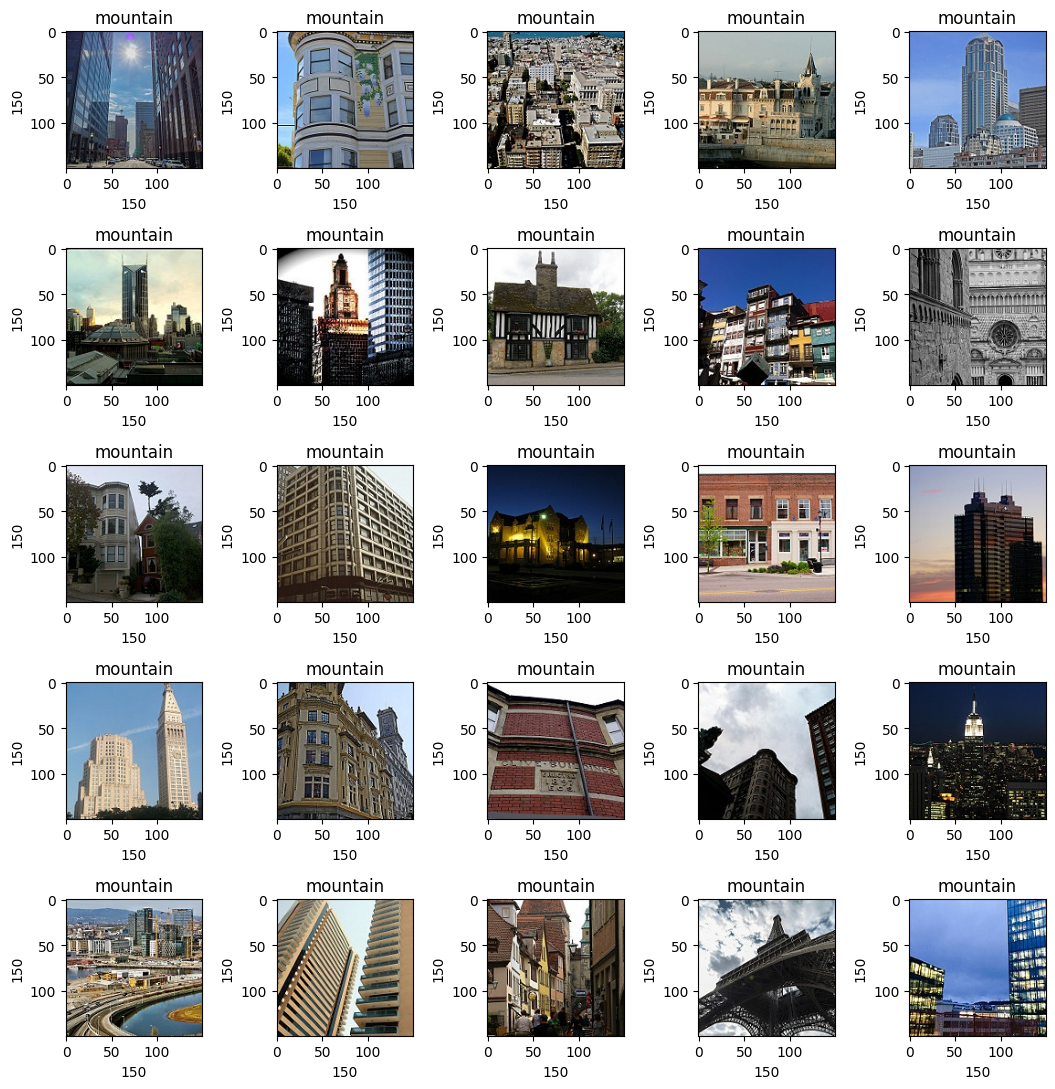

In [10]:
plt.figure(figsize=(11,11))
path = "/content/drive/MyDrive/Data science/project-13/Data/Intel Image Dataset/buildings"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.title('mountain')
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [11]:
dir = "/content/drive/MyDrive/Data science/project-13/Data/Intel Image Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

In [12]:
dir

'/content/drive/MyDrive/Data science/project-13/Data/Intel Image Dataset'

In [13]:
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = Image.open(image_path)
    image = image.resize((150,150))
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [14]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

,count
0,
glacier,553
mountain,525
sea,510
street,501
forest,474
buildings,437


In [15]:
num_classes = len(label_counts)
num_classes

6

In [16]:
np.array(image_list).shape

(3000, 150, 150, 3)

In [17]:
label_list = np.array(label_list)
label_list.shape

(3000,)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [19]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 150,150,3)
x_test = x_test.reshape( -1, 150,150,3)

In [20]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [21]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [22]:
model = Sequential([
        Conv2D(16, kernel_size = (3,3), input_shape = (150,150,3)),
        BatchNormalization(),
        LeakyReLU(),

        Conv2D(32, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Conv2D(64, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),

        Conv2D(128, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Flatten(),

        Dense(64),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),

        Dense(32),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),

        Dense(16),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(1),

        Dense(6, activation = 'softmax')
        ])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 148, 148, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 146, 146, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 146, 146, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 27, 27, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │             

 Total params: 306,422 (1.17 MB)

 Trainable params: 305,718 (1.17 MB)

 Non-trainable params: 704 (2.75 KB)

In [23]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

In [24]:
epochs = 70
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 29s 530ms/step - accuracy: 0.3020 - loss: 1.8819 - val_accuracy: 0.2375 - val_loss: 1.7324
Epoch 2/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 147ms/step - accuracy: 0.5690 - loss: 1.1916 - val_accuracy: 0.1458 - val_loss: 1.9955
Epoch 3/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.5833 - loss: 1.1105 - val_accuracy: 0.1396 - val_loss: 2.1402
Epoch 4/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.6515 - loss: 0.9713 - val_accuracy: 0.1396 - val_loss: 2.2628
Epoch 5/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.6791 - loss: 0.9085 - val_accuracy: 0.1396 - val_loss: 2.4835
Epoch 6/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.7091 - loss: 0.8192 - val_accuracy: 0.1396 - val_loss: 2.7857
Epoch 7/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.7542 - loss: 0.7474 - val_accuracy: 0.1396 - val_loss: 2.6832
Epoch 8/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.7740 - loss: 0.6881 - val_accuracy: 

In [29]:
model.save("/content/drive/MyDrive/Data science/project-13/model.keras")

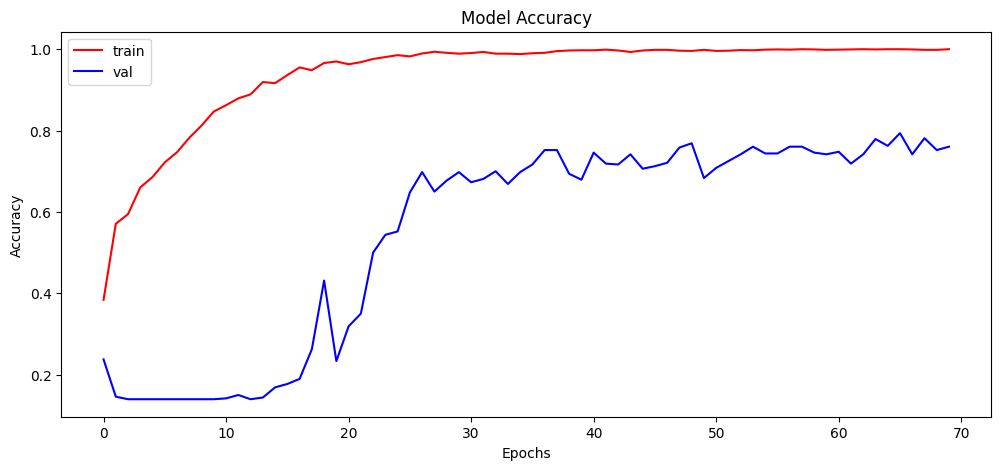

In [30]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

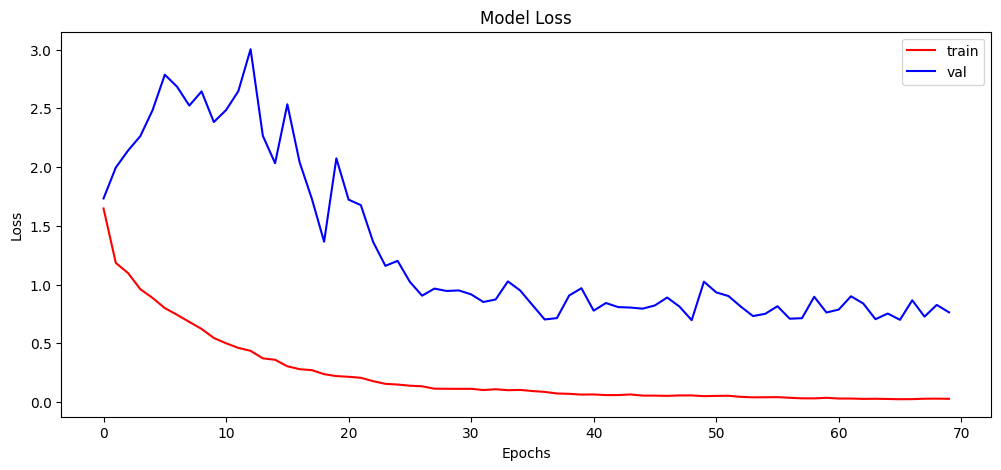

In [31]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [32]:
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.7778 - loss: 0.7799
Test Accuracy: 77.49999761581421


In [33]:
y_pred = model.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


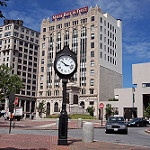

In [34]:
img = array_to_img(x_test[1])
img

In [35]:
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[1])])
print("Predicted : ",labels[np.argmax(y_pred[1])])

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Originally :  buildings
Predicted :  buildings
